Цель проекта
Выявить параметры будущей модели для предсказания результатов сдачи гос. экзамена по математике в зависимости от условий жизни школьников

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

Загружаем датасет из указанного каталога folder_path

In [2]:
folder_path = 'D:/Документы/Programs/DataFile/Проект 2 EDA/'
stud_math = pd.read_csv(f'{folder_path}stud_math.csv')

In [152]:
# блок функций

# определение 25, 75-го проценттиля, IQR и границ выбросов из данных Series на входе.
# вывод в Series по описанному порядку
def blowout(list):
    iqr_blow = []
    iqr_blow.append(list.quantile(0.25))
    iqr_blow.append(list.quantile(0.75))
    iqr_blow.append(iqr_blow[1] - iqr_blow[0])
    iqr_blow.append(iqr_blow[0] - 1.5*iqr_blow[2])
    iqr_blow.append(iqr_blow[1] + 1.5*iqr_blow[2])
    return(iqr_blow)

# графики распределения переменной column_y в зависимости от номинативной переменной из column_x
# учитываются все уникальные значения из column_x (т.к. максимум во всех столбцах не превышает 5ти)
def get_boxplot(column_x, column_y):
    fig, ax = plt.subplots(figsize = (4, 4))
    sns.boxplot(x=column_x, y=column_y, 
                data=stud_math.loc[:, [column_x, column_y]],
               ax=ax)
    plt.xticks(rotation=90)
    ax.set_title('Boxplot for ' + column_x)
    plt.show()

# теста Стьюдента
# проверка нулевой гипотезы о том, что распределения column_y по различным параметрам column_x неразличимы
def get_stat_dif(column_x, column_y):
    cols = stud_math.loc[:, column_x].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column_x] == comb[0], column_y], 
                        stud_math.loc[stud_math.loc[:, column_x] == comb[1], column_y]).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column_x)
            break

In [5]:
print(f'Таблица с данными учеников содержит {stud_math.shape[0]} строк и {stud_math.shape[1]} столбцов.')

Таблица с данными учеников содержит 395 строк и 30 столбцов.


In [6]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [7]:
# изменим названия столбцов
# сделаем все буквы прописные и заменим ", " на "_"
stud_math.columns = [x.lower().replace(', ','_') for x in stud_math.columns]
# сохраним список столбцов с типом данных
sm_col_type = stud_math.dtypes
sm_col_type

school                 object
sex                    object
age                     int64
address                object
famsize                object
pstatus                object
medu                  float64
fedu                  float64
mjob                   object
fjob                   object
reason                 object
guardian               object
traveltime            float64
studytime             float64
failures              float64
schoolsup              object
famsup                 object
paid                   object
activities             object
nursery                object
studytime_granular    float64
higher                 object
internet               object
romantic               object
famrel                float64
freetime              float64
goout                 float64
health                float64
absences              float64
score                 float64
dtype: object

In [8]:
print(f'В таблице приемущественно строковые данные, {len(sm_col_type.index[sm_col_type == "object"])} \
из {len(sm_col_type.index)} столбцов, и \
{len(sm_col_type[(sm_col_type == "int64") | (sm_col_type == "float64")])} \
столбцов с числовыми данными')

В таблице приемущественно строковые данные, 17 из 30 столбцов, и 13 столбцов с числовыми данными


In [9]:
print(f'Таблица содержит {stud_math.isnull().any().sum()} столбцов с отсутствующими (NaN) данными из {stud_math.shape[1]}')

Таблица содержит 27 столбцов с отсутствующими (NaN) данными из 30


In [10]:
col_non_null = [col for col in stud_math.columns if not stud_math[col].isnull().any()]
print(f'Столбцы с полностью заполненными данными: {col_non_null}')

Столбцы с полностью заполненными данными: ['school', 'sex', 'age']


1. Анализируем числовые столбцы

In [11]:
print(f'Анализируем числовые столбцы ({len(sm_col_type.index[(sm_col_type == "int64") | (sm_col_type == "float64")])}): \n\
{sm_col_type[(sm_col_type == "int64") | (sm_col_type == "float64")]}')

Анализируем числовые столбцы (13): 
age                     int64
medu                  float64
fedu                  float64
traveltime            float64
studytime             float64
failures              float64
studytime_granular    float64
famrel                float64
freetime              float64
goout                 float64
health                float64
absences              float64
score                 float64
dtype: object


1.1. Анализ возраста учеников (age)

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

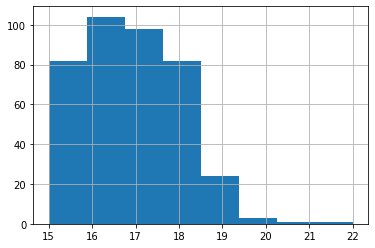

In [12]:
stud_math.age.hist(bins=stud_math.age.nunique())
stud_math.age.describe()

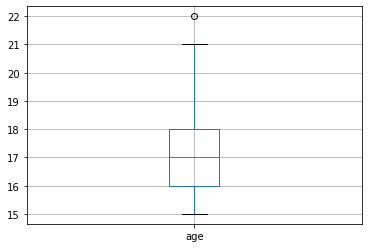

In [13]:
stud_math.boxplot(column=['age'])

In [14]:
age_bl = blowout(stud_math.age)
print(f'Возраст распределен\n\
25-й перцентиль: {age_bl[0]}, \
75-й перцентиль: {age_bl[1]}, \
IQR: {age_bl[2]}, \
Границы выбросов: {age_bl[3:]}')

Возраст распределен
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0, Границы выбросов: [13.0, 21.0]


Согласно последнему графику и расчетам границ выбросов, возраст школьников болле 21 года является выбросом. 
Некорректно заполненных значений нет.
Для дальнейшего анализа данных, оставляем данные по школьникам с возрастом не более верхней границы интерквартильного расстояния (21 год)

In [15]:
stud_math = stud_math.loc[stud_math.age <= age_bl[4]]
stud_math

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


1.2. Анализ столбца "Образование матери" (medu) (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 
                                                 3 - среднее специальное или 11 классов, 4 - высшее)

In [16]:
stud_math.medu.value_counts()

4.0    131
2.0    102
3.0     96
1.0     59
0.0      3
Name: medu, dtype: int64

In [17]:
stud_math.medu.value_counts(normalize=True)

4.0    0.335038
2.0    0.260870
3.0    0.245524
1.0    0.150895
0.0    0.007673
Name: medu, dtype: float64

count    391.000000
mean       2.749361
std        1.099461
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

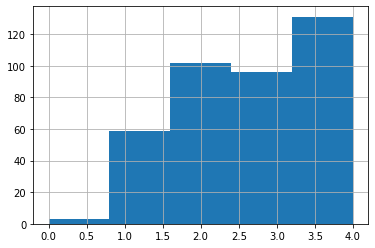

In [18]:
stud_math.medu.hist(bins=stud_math.medu.nunique())
stud_math.medu.describe()

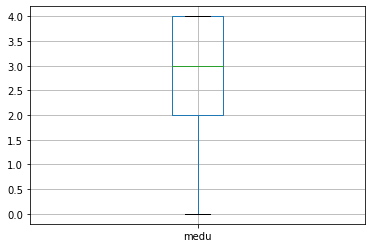

In [19]:
stud_math.boxplot(column=['medu'])

Данные в столбце "Образование матери" не содержат выбросов.
Некорректно заполненных значений нет.
Данные оставляем без изменения

1.3. Анализ столбца "Образование отца" (fedu) (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 
                                               3 - среднее специальное или 11 классов, 4 - высшее)

In [20]:
stud_math.fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      77
0.0       2
40.0      1
Name: fedu, dtype: int64

In [21]:
stud_math.fedu.value_counts(normalize=True)

2.0     0.286486
3.0     0.259459
4.0     0.237838
1.0     0.208108
0.0     0.005405
40.0    0.002703
Name: fedu, dtype: float64

count    370.000000
mean       2.618919
std        2.230163
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

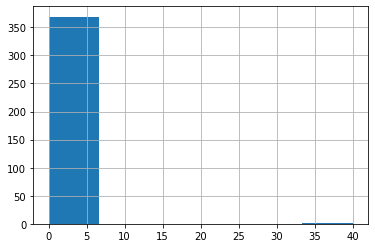

In [22]:
stud_math.fedu.hist(bins=stud_math.fedu.nunique())
stud_math.fedu.describe()

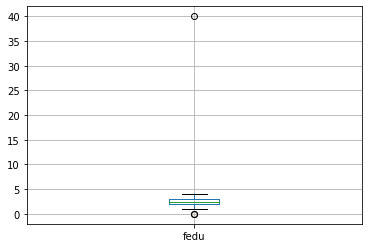

In [23]:
stud_math.boxplot(column=['fedu'])

Видим выбросы со значениями 0 и 40, что менее 1% каждый. Руководствуясь здравым смыслом, определяем, что только выброс со значением 40 является ошибкой, т.к. из описания допустимых значений в данном столбце, максимальным является 4. Значение 0 входит в допустимые значения.
Некорректно заполненных значений нет.
Оставляем данные по образованию с реальными значениями между 0 и 4

In [24]:
stud_math = stud_math[(stud_math.fedu.between(0,4)) | (stud_math.fedu.isna())]
stud_math

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


1.4. Анализ столбца "Время в пути до школы" (traveltime) (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [25]:
stud_math.traveltime.value_counts()

1.0    241
2.0     96
3.0     21
4.0      7
Name: traveltime, dtype: int64

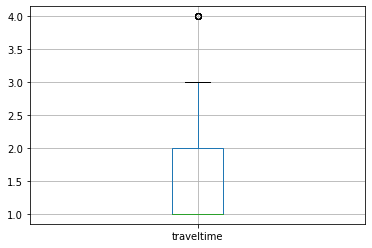

In [26]:
stud_math.boxplot(column=['traveltime'])

Хотя 4 и находится вне рамок интерквартильного расстояния, но является допустимым значением из приведенных в описании к данному столбцу.
Некорректно заполненных значений нет.
Данные оставляем без изменения

1.5. Анализ столбца "Время на учёбу помимо школы в неделю" (studytime) (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [27]:
stud_math.studytime.value_counts()

2.0    194
1.0    102
3.0     63
4.0     27
Name: studytime, dtype: int64

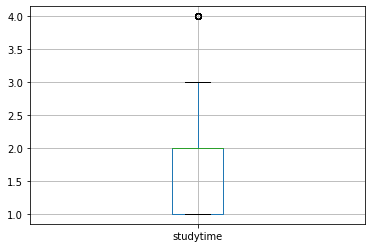

In [28]:
stud_math.boxplot(column=['studytime'])

Хотя 4 и находится вне рамок интерквартильного расстояния, но является допустимым значением из приведенных в описании к данному столбцу.
Некорректно заполненных значений нет.
Данные оставляем без изменения

1.6. Анализ столбца "Количество внеучебных неудач" (failures) (n, если 1<=n<=3, иначе 0)

In [29]:
stud_math.failures.value_counts()

0.0    292
1.0     49
2.0     16
3.0     14
Name: failures, dtype: int64

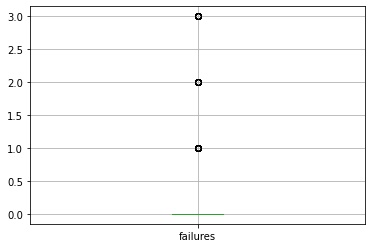

In [30]:
stud_math.boxplot(column=['failures'])

Значения от 1 до 3 находится вне рамок интерквартильного расстояния, но является допустимым значением из приведенных в описании к данному столбцу. Некорректно заполненных значений нет. Данные оставляем без изменения

1.7. Анализ столбца studytime_granular

In [31]:
stud_math.studytime_granular.value_counts()

-6.0     194
-3.0     102
-9.0      63
-12.0     27
Name: studytime_granular, dtype: int64

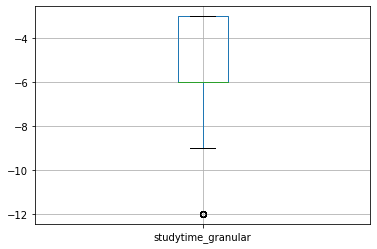

In [32]:
stud_math.boxplot(column=['studytime_granular'])

Значение (-12) находится вне рамок интерквартильного расстояния, но практически может являтся допустимым значением, т.к. оно кратно 3м, как и остальные уникальные значения в этом столбце, и может быть просто следующим значением за значением (-9). Некорректно заполненных значений нет. Данные оставляем без изменения

1.8. Анализ столбца "Семейные отношения" (famrel) (от 1 - очень плохо до 5 - очень хорошо)

In [33]:
stud_math.famrel.value_counts()

 4.0    182
 5.0     97
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

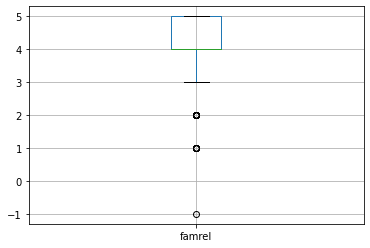

In [34]:
stud_math.boxplot(column=['famrel'])

Т.к. шкала значений задана от 1 до 5, то только (-1) считаем выбросом.
Некорректно заполненных значений нет.
Оставляем данные в пределах заданного диапазона от 1 до 5

In [35]:
stud_math = stud_math[(stud_math.famrel.between(1,5)) | (stud_math.famrel.isna())]
stud_math

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


1.9. Анализ столбца "Свободное время после школы" (freetime) (от 1 - очень мало до 5 - очень мого)

In [36]:
stud_math.freetime.value_counts()

3.0    153
4.0    111
2.0     61
5.0     38
1.0     18
Name: freetime, dtype: int64

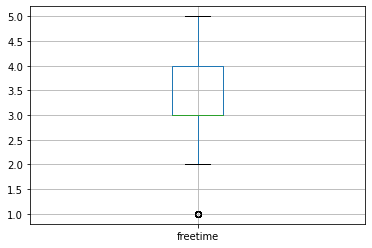

In [37]:
stud_math.boxplot(column=['freetime'])

Т.к. шкала значений задана от 1 до 5, то 1 не считаем выбросом.
Некорректно заполненных значений нет.
Данные оставляем без изменения

1.10. Анализ столбца "Проведение времени с друзьями" (goout) (от 1 - очень мало до 5 - очень много)

In [38]:
stud_math.goout.value_counts()

3.0    127
2.0     99
4.0     84
5.0     51
1.0     23
Name: goout, dtype: int64

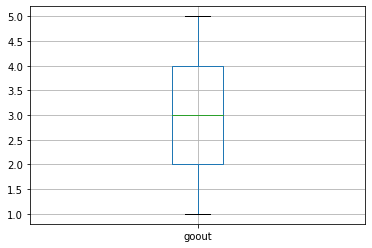

In [39]:
stud_math.boxplot(column=['goout'])

Выбросов нет. 
Некорректно заполненных значений нет. 
Данные оставляем без изменения

1.11. Анализ столбца "Текущее состояние здоровья" (health) (от 1 - очень плохо до 5 - очень хорошо)

In [40]:
stud_math.health.value_counts()

5.0    137
3.0     89
4.0     62
1.0     46
2.0     43
Name: health, dtype: int64

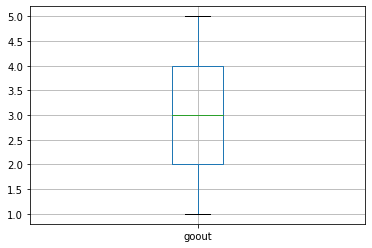

In [41]:
stud_math.boxplot(column=['goout'])

Выбросов нет. 
Некорректно заполненных значений нет. 
Данные оставляем без изменения

1.12. Анализ столбца "Количество пропущенных занятий" (absences)

In [42]:
stud_math.absences.value_counts()

0.0      111
2.0       60
4.0       52
6.0       31
8.0       21
10.0      17
12.0      12
14.0      11
3.0        8
16.0       6
7.0        6
18.0       5
5.0        5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

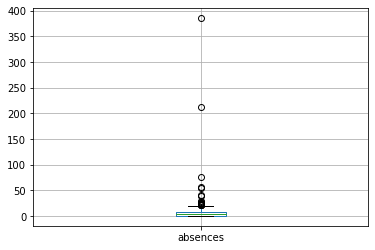

In [43]:
stud_math.boxplot(column=['absences'])

count    380.000000
mean       7.247368
std       23.550471
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

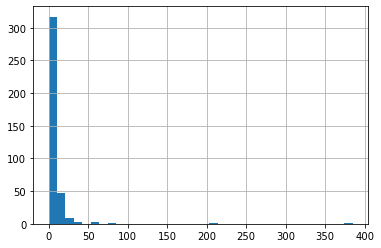

In [44]:
stud_math.absences.hist(bins=stud_math.absences.nunique())
stud_math.absences.describe()

In [45]:
absences_bl = blowout(stud_math.absences)
print(f'Количество пропусков распределено\n\
25-й перцентиль: {absences_bl[0]}, \
75-й перцентиль: {absences_bl[1]}, \
IQR: {absences_bl[2]}, \
Границы выбросов: {absences_bl[3:]}')

Количество пропусков распределено
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0, Границы выбросов: [-12.0, 20.0]


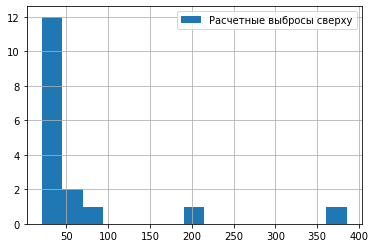

In [46]:
stud_math[stud_math.absences > absences_bl[4]].absences.hist(bins=\
stud_math[stud_math.absences > absences_bl[4]].absences.nunique(), label='Расчетные выбросы сверху')
plt.legend()

Согласно графику расчетных выбросов сверху, примем за реальными выброс значения >100.
Некорректно заполненных значений нет.
Оставляем данные о пропусках меннее 100

In [47]:
stud_math = stud_math[(stud_math.absences < 100) | (stud_math.absences.isna())]
stud_math

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


1.13. Анализ столбца "Баллы по госэкзамену по математике" (score)

In [48]:
stud_math.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     30
40.0     29
70.0     27
45.0     26
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
95.0      5
85.0      5
100.0     1
20.0      1
Name: score, dtype: int64

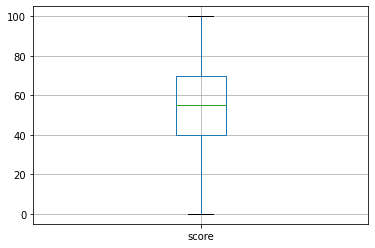

In [49]:
stud_math.boxplot(column=['score'])

count    384.000000
mean      52.239583
std       22.983929
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

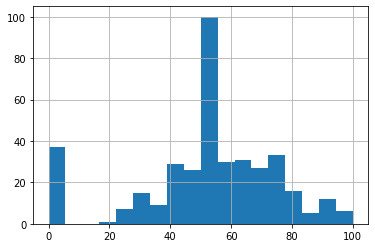

In [50]:
stud_math.score.hist(bins=stud_math.score.nunique())
stud_math.score.describe()

In [51]:
stud_math[stud_math.score.isna()]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


Судя по графикам Box plot и Histogram, значения баллов = 0 скорее всего соответствуют совсем не здавшим экзамен ученикам. Некорректно заполненных значений нет. Отсутстствующие значения (NaN) соответствуют неопределенному результату, и такие записи для анализа непригодны. Оставляем данные только с реальными баллами

In [52]:
stud_math = stud_math[stud_math.score.isna() == False]
stud_math

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Проведем корреляционный анализ количественных переменных

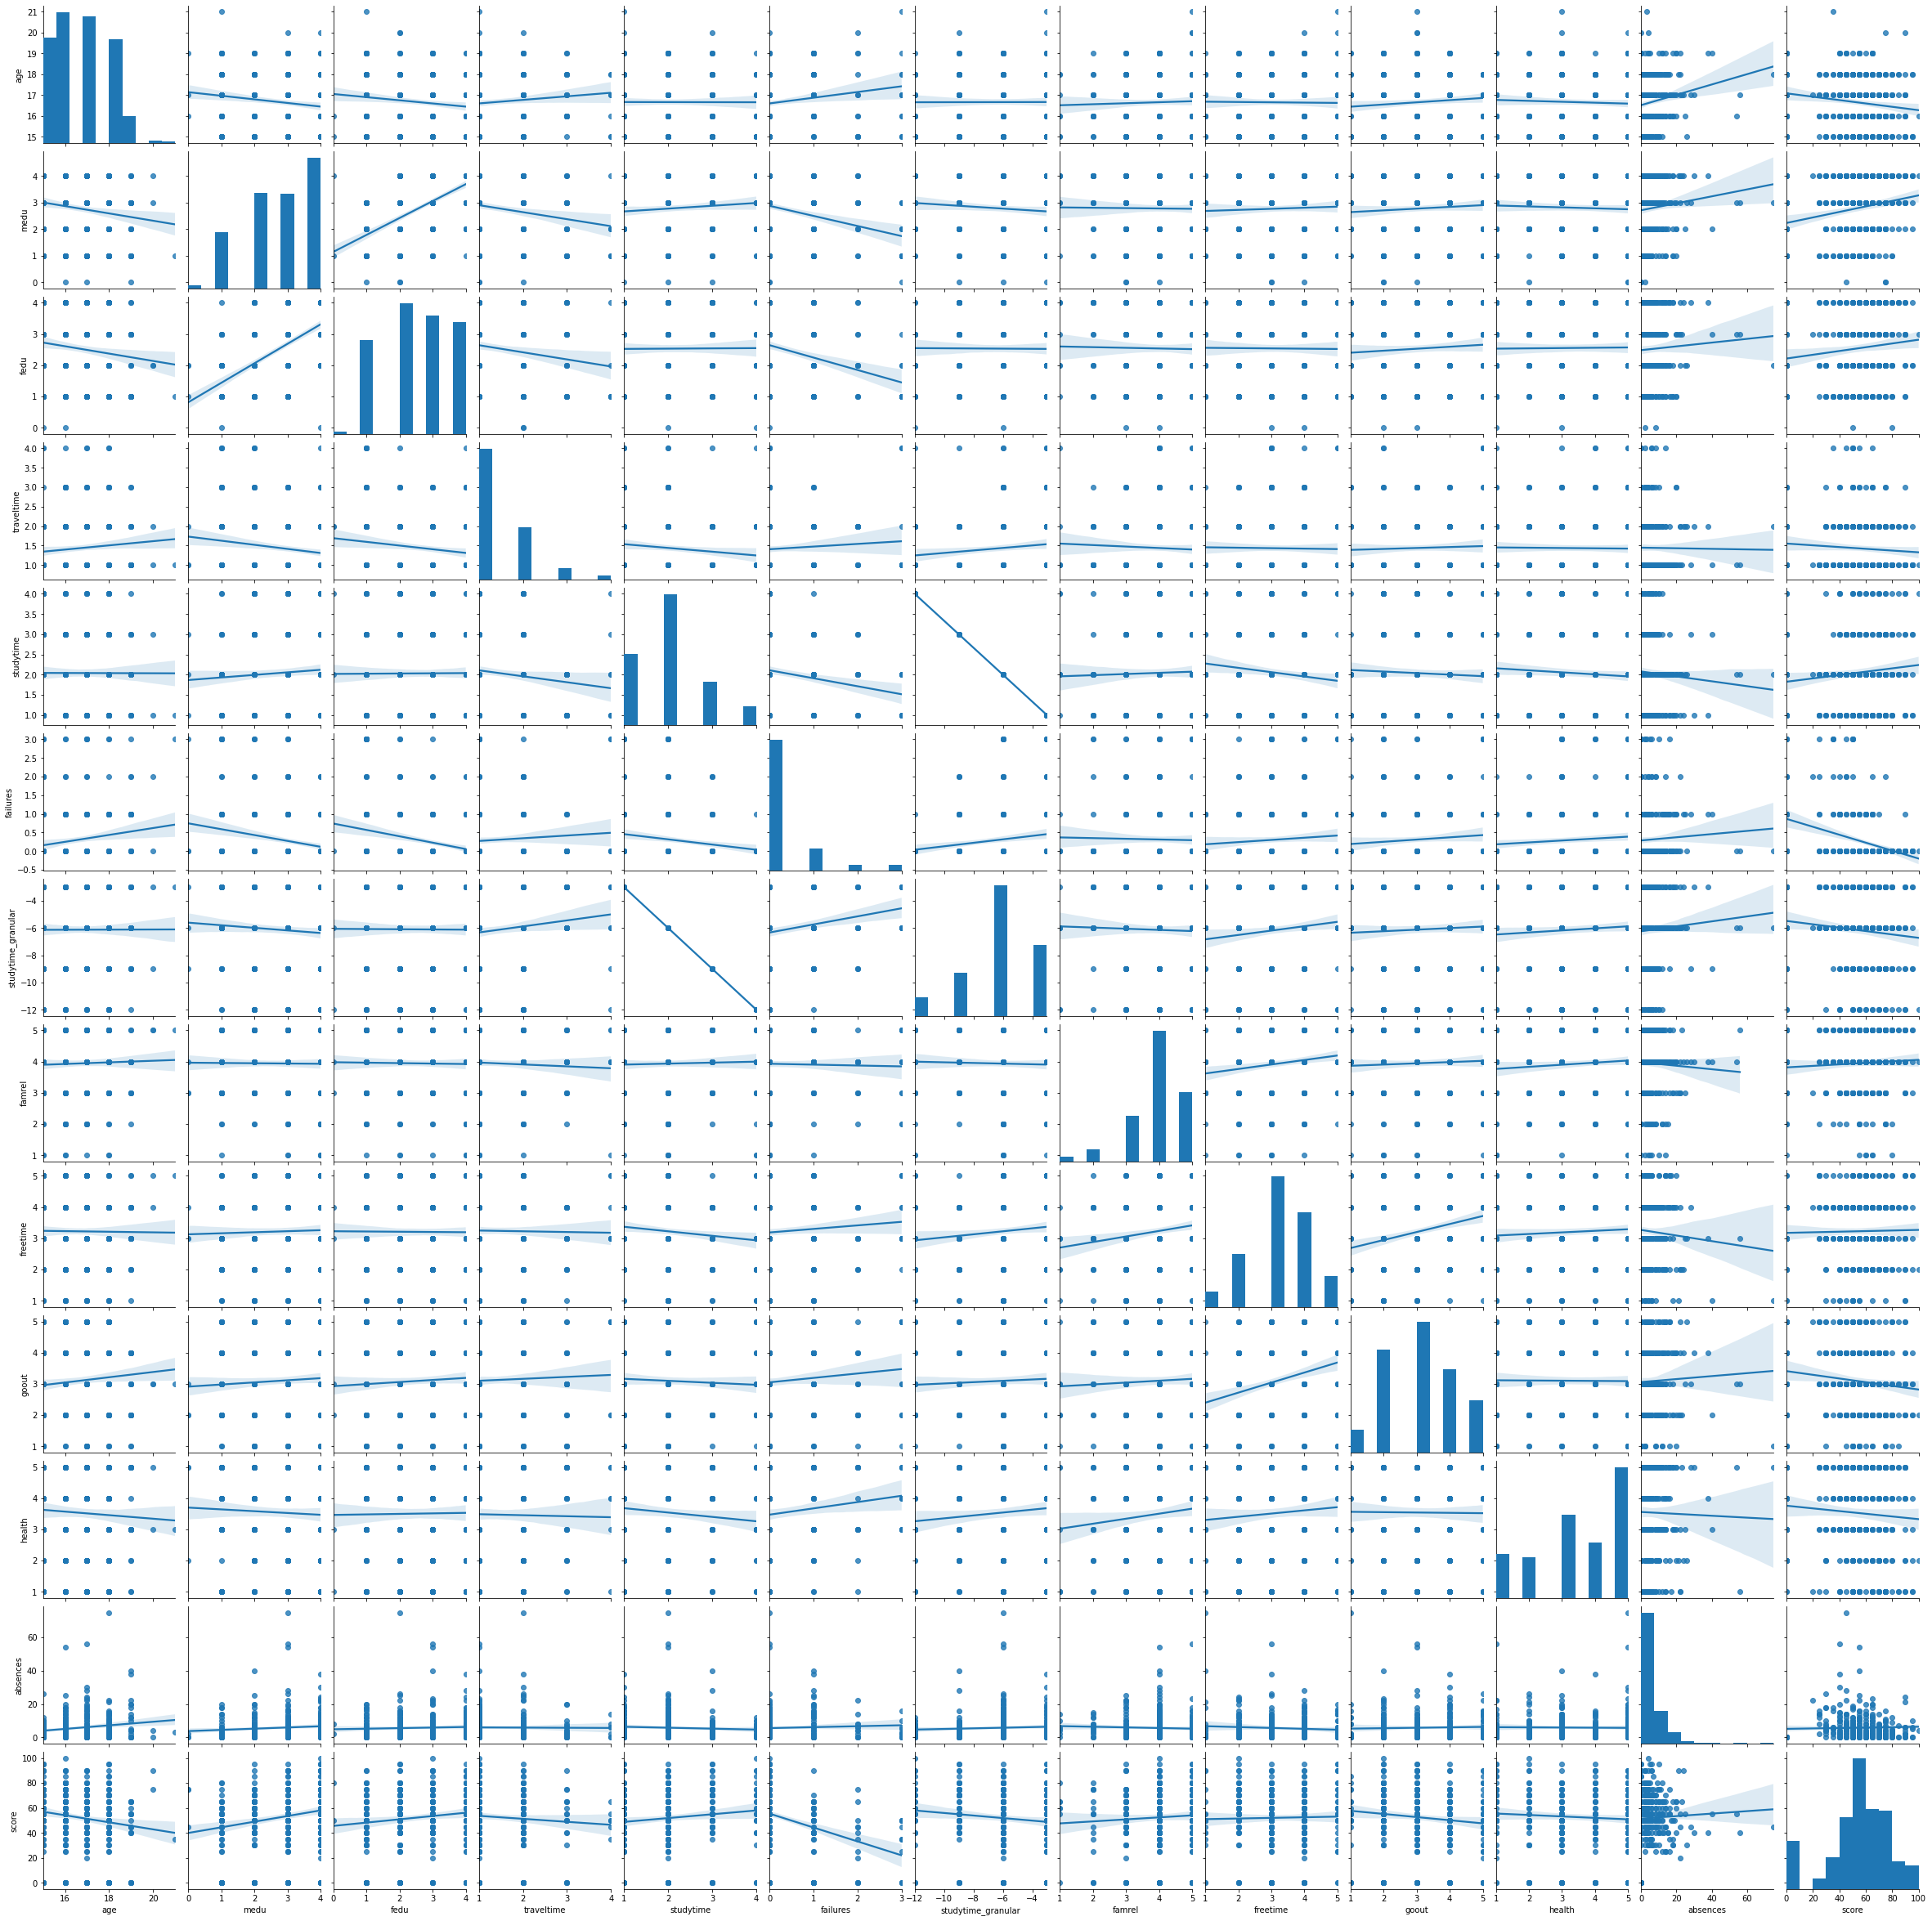

In [53]:
sns.pairplot(stud_math, kind = 'reg')

Используем для наглядности матрицу корреляций

In [54]:
stud_math.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.154428,-0.133446,0.095964,-0.002314,0.159512,0.002314,0.035303,-0.012006,0.093955,-0.050205,0.163345,-0.151301
medu,-0.154428,1.000000,0.629964,-0.166822,0.082032,-0.244539,-0.082032,-0.010661,0.036596,0.066683,-0.045219,0.097354,0.216635
fedu,-0.133446,0.629964,1.000000,-0.146841,0.006591,-0.260821,-0.006591,-0.017491,-0.008635,0.064800,0.012647,0.045542,0.125975
traveltime,0.095964,-0.166822,-0.146841,1.000000,-0.119467,0.070726,0.119467,-0.048087,-0.016588,0.039056,-0.015598,-0.008923,-0.073637
studytime,-0.002314,0.082032,0.006591,-0.119467,1.000000,-0.166382,-1.000000,0.029944,-0.124453,-0.049471,-0.083793,-0.058216,0.112529
failures,0.159512,-0.244539,-0.260821,0.070726,-0.166382,1.000000,0.166382,-0.022845,0.081779,0.092029,0.102176,0.049318,-0.344765
studytime_granular,0.002314,-0.082032,-0.006591,0.119467,-1.000000,0.166382,1.000000,-0.029944,0.124453,0.049471,0.083793,0.058216,-0.112529
famrel,0.035303,-0.010661,-0.017491,-0.048087,0.029944,-0.022845,-0.029944,1.000000,0.160128,0.048764,0.104093,-0.046303,0.062552
freetime,-0.012006,0.036596,-0.008635,-0.016588,-0.124453,0.081779,0.124453,0.160128,1.000000,0.287378,0.072193,-0.068973,0.022124
goout,0.093955,0.066683,0.064800,0.039056,-0.049471,0.092029,0.049471,0.048764,0.287378,1.000000,-0.008700,0.035025,-0.121989


Согласно графмкам и  матрице корреляций, видим, что "studytime" полностью коррелирует с "studytime_granular", только с противоположными значениями. Корреляций других переменных не наблюдается.
Для дальнейшего исследования оставляем "studytime".

In [55]:
stud_math.drop(['studytime_granular'], inplace = True, axis = 1)
stud_math

D:\MyProg\Programm\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


2. Анализируем столбцы c номинативными данными

In [56]:
print(f'Анализируем строковые столбцы ({len(sm_col_type.index[sm_col_type == "object"])}): \n\
{sm_col_type[sm_col_type == "object"]}')

Анализируем строковые столбцы (17): 
school        object
sex           object
address       object
famsize       object
pstatus       object
mjob          object
fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
dtype: object


2.1. Анализ столбца "Аббревиатура школы, в которой учится ученик" (school)

In [57]:
print(f'В таблице представлены данные по {stud_math.school.nunique()} школам: {stud_math.school.unique()[0]} -\
 {round(stud_math.school.value_counts(normalize=True)[0],2)*100}% и {stud_math.school.unique()[1]} -\
 {round(stud_math.school.value_counts(normalize=True)[1],2)*100}%'
     )

В таблице представлены данные по 2 школам: GP - 89.0% и MS - 11.0%


2.2. Анализ столбца "Пол ученика ('F' - женский, 'M' - мужской)" (sex)

In [58]:
print(f'Распределение по полу учеников следующее: {stud_math.sex.unique()[0]} -\
 {round(stud_math.sex.value_counts(normalize=True)[0],2)*100}% и {stud_math.sex.unique()[1]} -\
 {round(stud_math.sex.value_counts(normalize=True)[1],2)*100}%'
     )

Распределение по полу учеников следующее: F - 52.0% и M - 48.0%


2.3. Анализ столбца "Тип адреса ученика ('U' - городской, 'R' - за городом)" (address)

In [59]:
stud_math.address.value_counts()

U    286
R     83
Name: address, dtype: int64

Некорректно заполненных значений нет. Данные оставляем без изменения

2.4. Анализ столбца "Размер семьи('LE3' <= 3, 'GT3' >3)" (famsize)

In [60]:
stud_math.famsize.value_counts()

GT3    251
LE3    106
Name: famsize, dtype: int64

Некорректно заполненных значений нет. Данные оставляем без изменения

2.5. Анализ столбца "Cтатус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)" (pstatus)

In [61]:
stud_math.pstatus.value_counts()

T    306
A     35
Name: pstatus, dtype: int64

Некорректно заполненных значений нет. Данные оставляем без изменения

2.6. Анализ столбца "Работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)" (mjob)

In [62]:
stud_math.mjob.value_counts()

other       127
services     93
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

Некорректно заполненных значений нет. Данные оставляем без изменения

2.7. Анализ столбца "Работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)" (fjob)

In [63]:
stud_math.fjob.value_counts()

other       193
services     96
teacher      28
at_home      16
health       15
Name: fjob, dtype: int64

Некорректно заполненных значений нет. Данные оставляем без изменения

2.8. Анализ столбца "Причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)" (reason)

In [64]:
stud_math.reason.value_counts()

course        134
reputation    101
home          100
other          32
Name: reason, dtype: int64

Некорректно заполненных значений нет. Данные оставляем без изменения

2.9. Анализ столбца "Опекун ('mother' - мать, 'father' - отец, 'other' - другое)" (guardian)

In [65]:
stud_math.guardian.value_counts()

mother    245
father     85
other      24
Name: guardian, dtype: int64

Некорректно заполненных значений нет. Данные оставляем без изменения

2.10. Анализ столбца "Дополнительная образовательная поддержка (yes или no)" (schoolsup)

In [66]:
stud_math.schoolsup.value_counts()

no     327
yes     48
Name: schoolsup, dtype: int64

Некорректно заполненных значений нет. Данные оставляем без изменения

2.11. Анализ столбца "Семейная образовательная поддержка (yes или no)" (famsup)

In [67]:
stud_math.famsup.value_counts()

yes    213
no     134
Name: famsup, dtype: int64

Некорректно заполненных значений нет. Данные оставляем без изменения

2.12. Анализ столбца "Дополнительные платные занятия по математике (yes или no)" (paid)

In [68]:
stud_math.paid.value_counts()

no     194
yes    151
Name: paid, dtype: int64

Некорректно заполненных значений нет. Данные оставляем без изменения

2.13. Анализ столбца "Дополнительные внеучебные занятия (yes или no)" (activities)

In [69]:
stud_math.activities.value_counts()

yes    191
no     179
Name: activities, dtype: int64

Некорректно заполненных значений нет. Данные оставляем без изменения

2.14. Анализ столбца "Посещал детский сад (yes или no)" (nursery)

In [70]:
stud_math.nursery.value_counts()

yes    294
no      75
Name: nursery, dtype: int64

Некорректно заполненных значений нет. Данные оставляем без изменения

2.15. Анализ столбца "Хочет получить высшее образование (yes или no)" (higher)

In [71]:
stud_math.higher.value_counts()

yes    346
no      18
Name: higher, dtype: int64

Некорректно заполненных значений нет. Данные оставляем без изменения

2.16. Анализ столбца "Наличие интернета дома (yes или no)" (internet)

In [72]:
stud_math.internet.value_counts()

yes    296
no      54
Name: internet, dtype: int64

Некорректно заполненных значений нет. Данные оставляем без изменения

2.17. Анализ столбца "В романтических отношениях (yes или no)" (romantic)

In [73]:
stud_math.romantic.value_counts()

no     231
yes    122
Name: romantic, dtype: int64

Некорректно заполненных значений нет. Данные оставляем без изменения

Построим графики зависимости результата госэкзамента по математике от номинативных данных

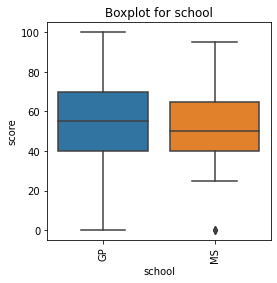

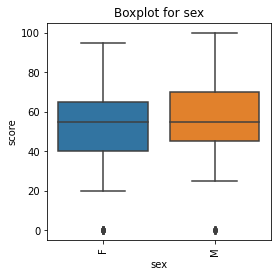

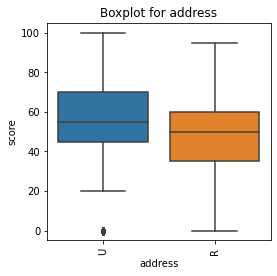

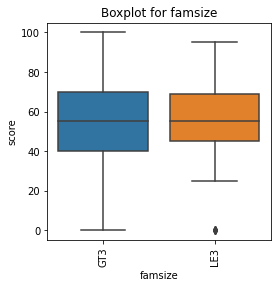

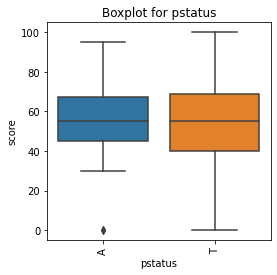

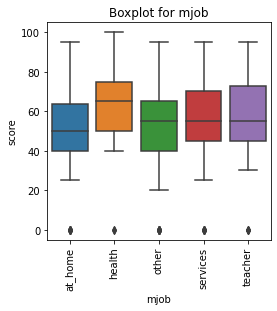

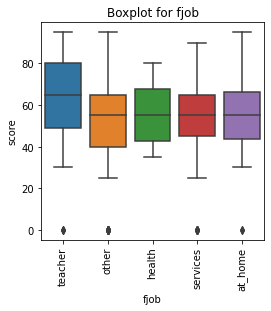

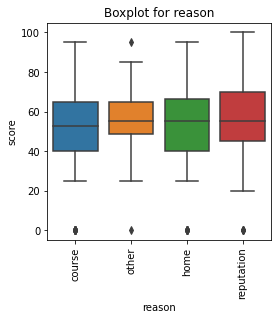

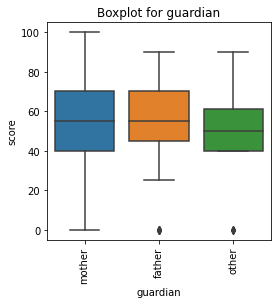

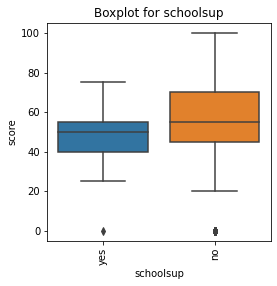

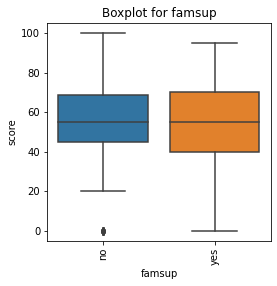

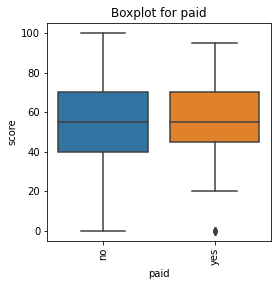

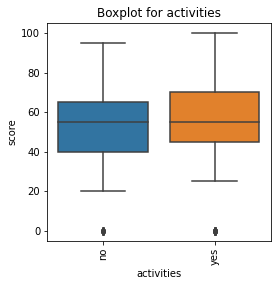

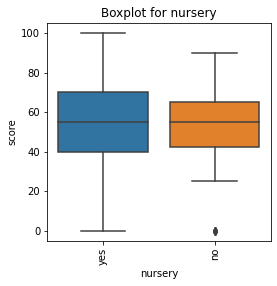

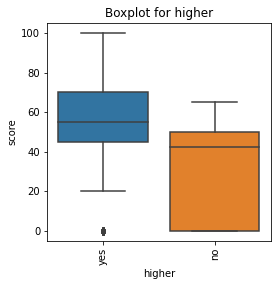

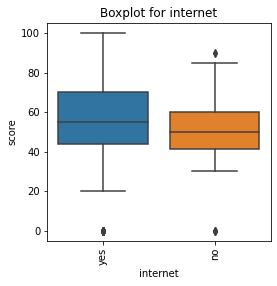

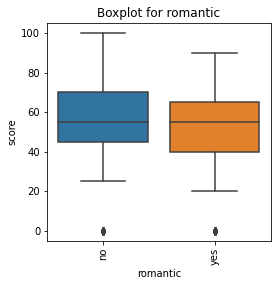

In [147]:
for col in sm_col_type.index[sm_col_type == "object"]:
    get_boxplot(col,'score')

Судя по графикам все номинативные параметры в большей или меньшей степени влияют на результат гос. экзамена по математике.

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения результата гос. экзамена по математике по различным параметрам неразличимы:

In [153]:
for col in sm_col_type.index[sm_col_type == "object"]:
    get_stat_dif(col,'score')

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Получаем 6 серьезно отличающихся номинативных параметра. Оставляем их в датасете для дальнейшего построения модели, добавляя к числовым переменным.

In [156]:
stud_math_for_model = stud_math.loc[:, ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel',\
                                        'freetime', 'goout', 'health', 'absences', 'score',\
                                       'sex', 'address', 'mjob', 'paid', 'higher', 'romantic']]

Итоговый датасет для дальнейшего построения модели включает следующие данные:

In [157]:
print(stud_math_for_model.head())
stud_math_for_model.info()

   age  medu  fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18   4.0   4.0         2.0        2.0       0.0     4.0       3.0    4.0   
1   17   1.0   1.0         1.0        2.0       0.0     5.0       3.0    3.0   
2   15   1.0   1.0         1.0        2.0       3.0     4.0       3.0    2.0   
3   15   4.0   2.0         1.0        3.0       0.0     3.0       2.0    2.0   
4   16   3.0   3.0         1.0        2.0       0.0     4.0       3.0    2.0   

   health  absences  score sex address     mjob paid higher romantic  
0     3.0       6.0   30.0   F       U  at_home   no    yes       no  
1     3.0       4.0   30.0   F       U  at_home   no    yes       no  
2     3.0      10.0   50.0   F       U  at_home  NaN    yes      NaN  
3     5.0       2.0   75.0   F       U   health  yes    yes      yes  
4     5.0       4.0   50.0   F       U    other  yes    yes       no  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 394
Data columns (total 1